In [1]:
import pickle

import pandas as pd
from IPython.core.display_functions import display
from matplotlib import pyplot as plt

from util.config import Config

from fixed_sample_points.config import *
from util.grid import generate_gird
from util.aspect import angle_to_direction

import seaborn as sns

In [2]:
config = Config.default()

In [3]:
site_meta_infos = []
for site in config.sites:
    n_landslide_points = len(pd.read_csv(os.path.join(points_dir, f"{site.name}_Landslide_Points_4sqm.txt")))
    n_no_landslide_points = len(pd.read_csv(os.path.join(points_dir, f"{site.name}_Random_Points_nonLS_4sqm.txt")))
    site_meta_infos.append(dict(
        name=site.name,
        year=site.year,
        n_points=n_landslide_points + n_no_landslide_points,
        n_landslide_points=n_landslide_points,
        n_no_landslide_points=n_no_landslide_points
    ))

In [4]:
display(pd.DataFrame(site_meta_infos).set_index('name'))

year  n_points  n_landslide_points  n_no_landslide_points
name                                                                      
Arosa            2014      1792                 896                    896
Baulmes          2014        52                  26                     26
Chrauchtal       2014     16146                8073                   8073
Hornbach         2015       876                 438                    438
Rappetal         2015      2046                1023                   1023
Turbach          2013      6020                3010                   3010
Urseren          2013      7404                3702                   3702
Val_Cluozza      2015       354                 177                    177
Val_D_Entremont  2013      3645                1823                   1822
Val_Piora        2015      2232                1116                   1116

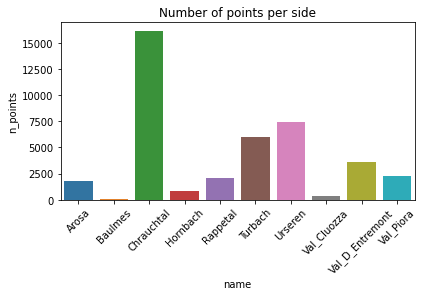

In [5]:
ax = sns.barplot(data=pd.DataFrame(site_meta_infos), x='name', y='n_points')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.title("Number of points per side")
plt.show()

In [6]:
def plot_f(f):
    for site in config.sites:
        # Load data of site
        with open(f'out/{site.name}_geo_df.pickle', 'rb') as handle:
            gdf_points = pickle.load(handle).reset_index()

        # Encode aspect
        gdf_points['aspect_factor'] = gdf_points['aspect'].apply(angle_to_direction)

        # plot features for site
        fig, axs = plt.subplots(4, 6, figsize=(16, 16))
        for feature, ax in zip(features, axs.flatten()):
            ax.set_title(feature)
            f(gdf_points, feature, ax)
        fig.suptitle(f"{site.name} features", fontsize=16)
        plt.tight_layout()
        plt.show()

        del gdf_points


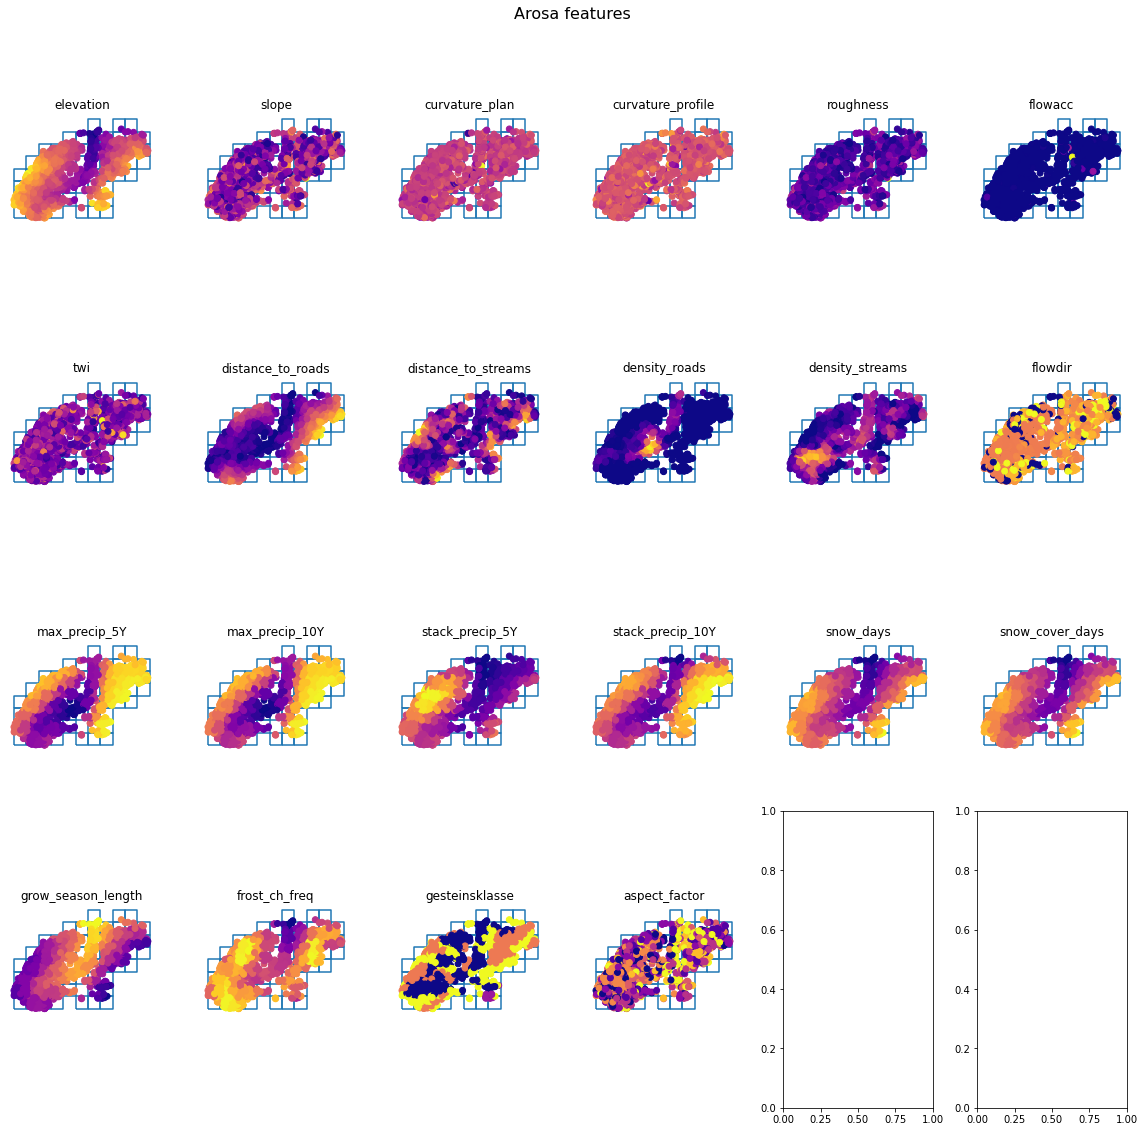

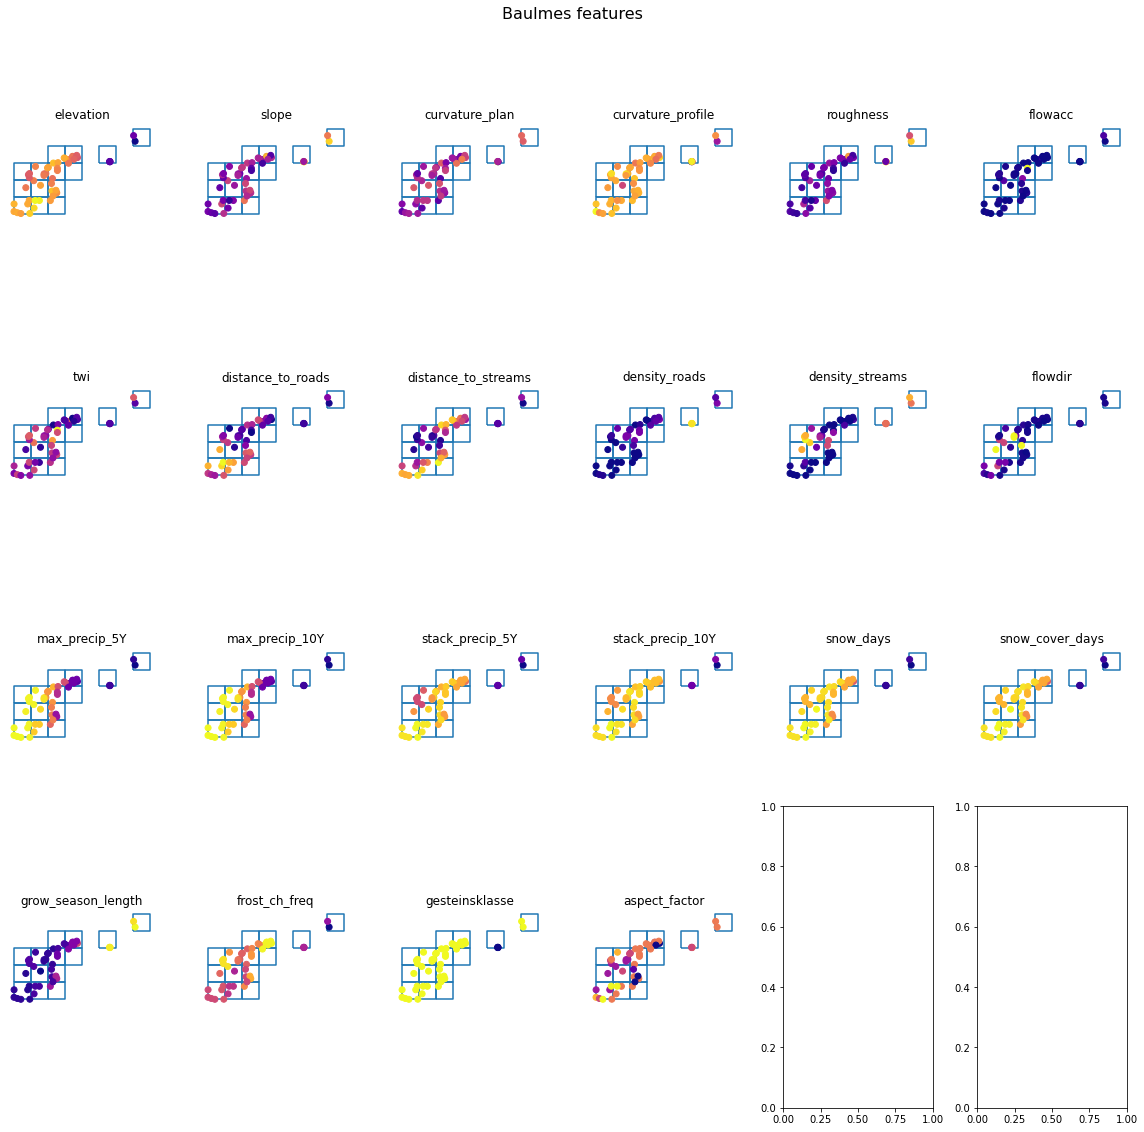

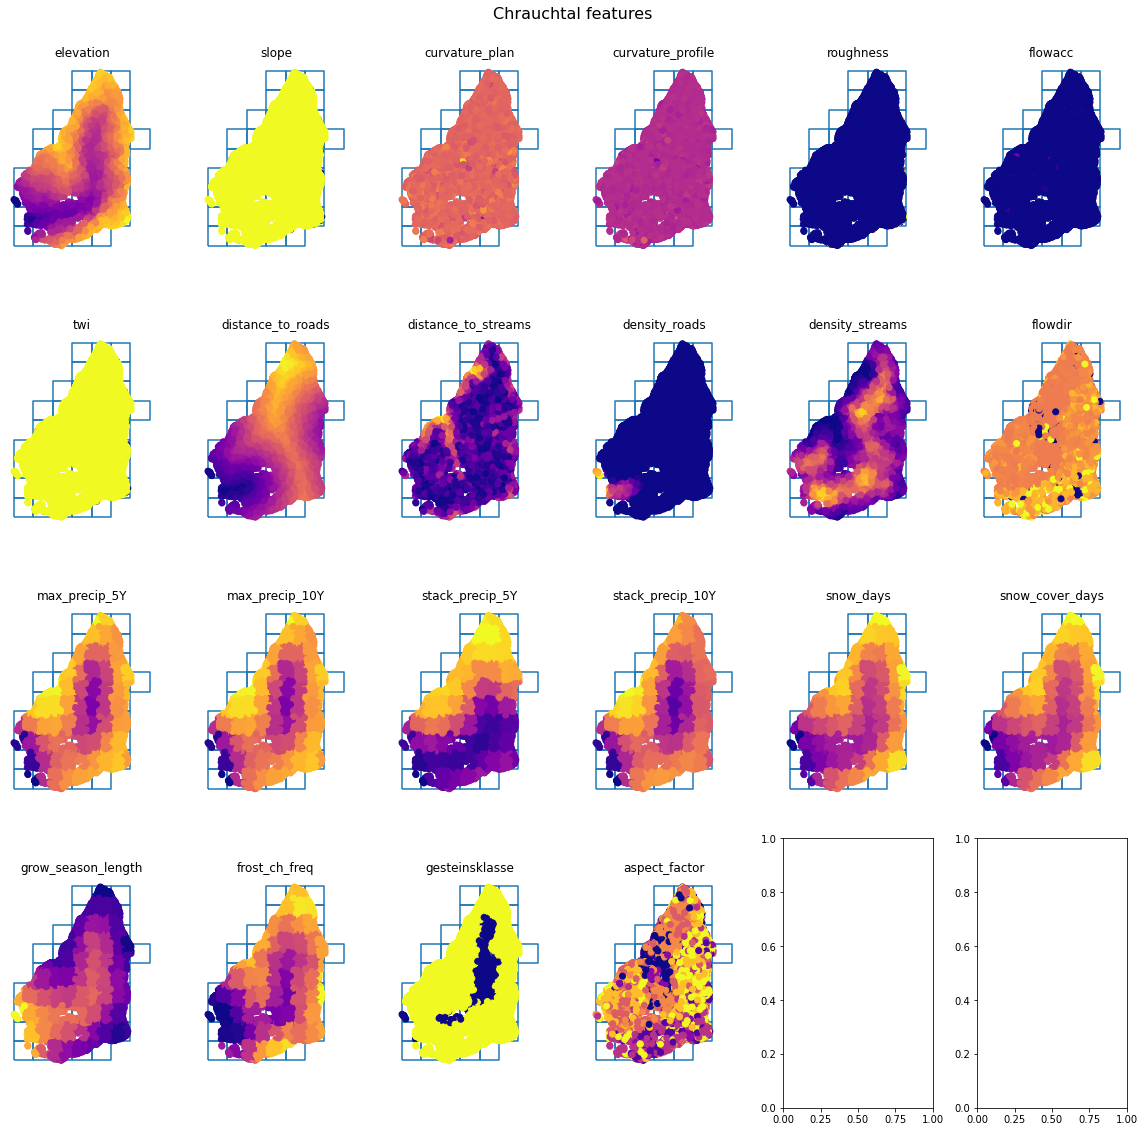

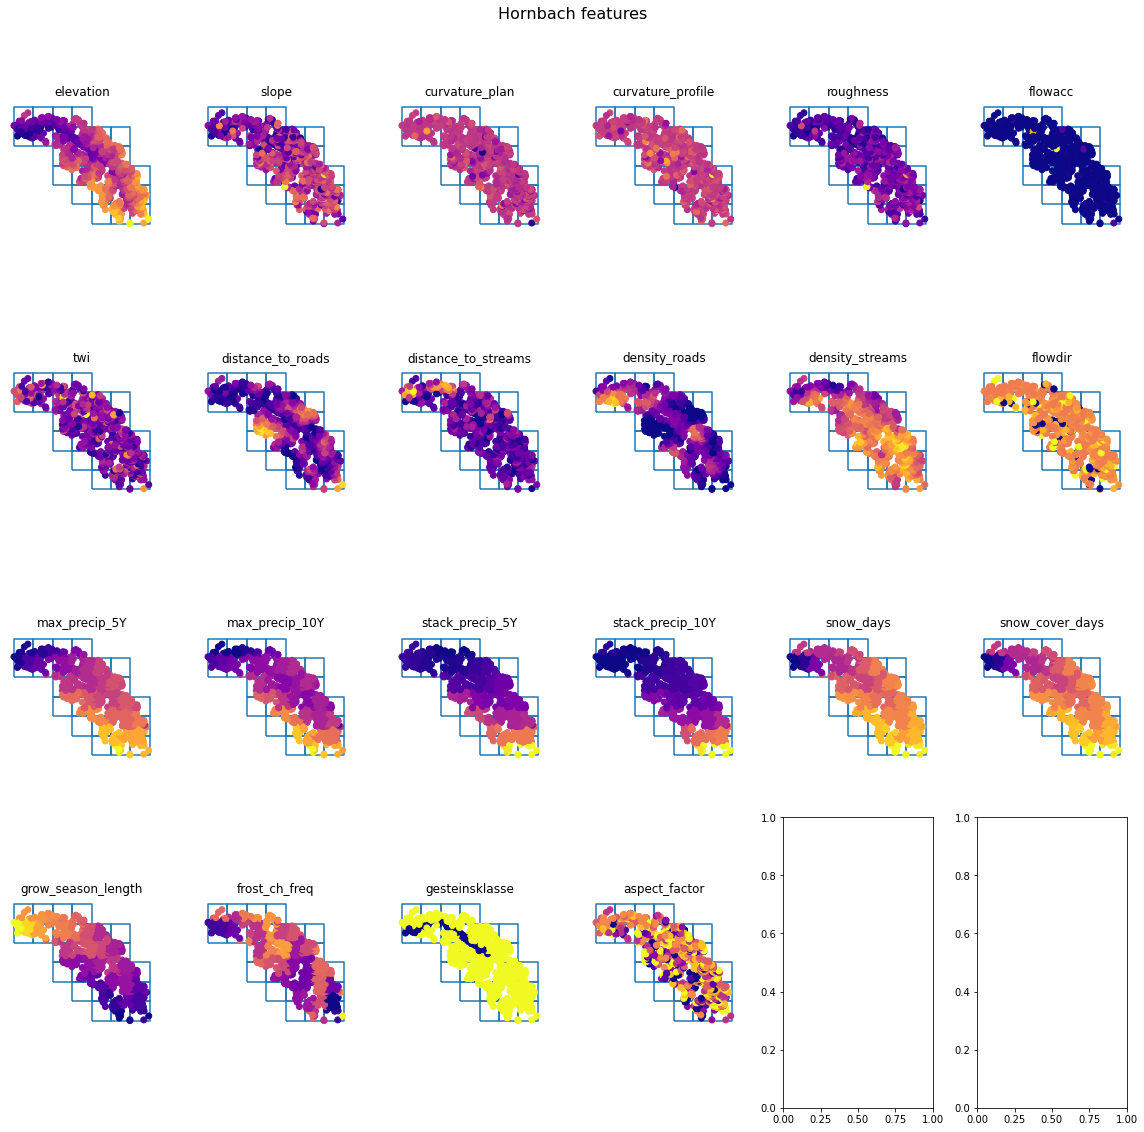

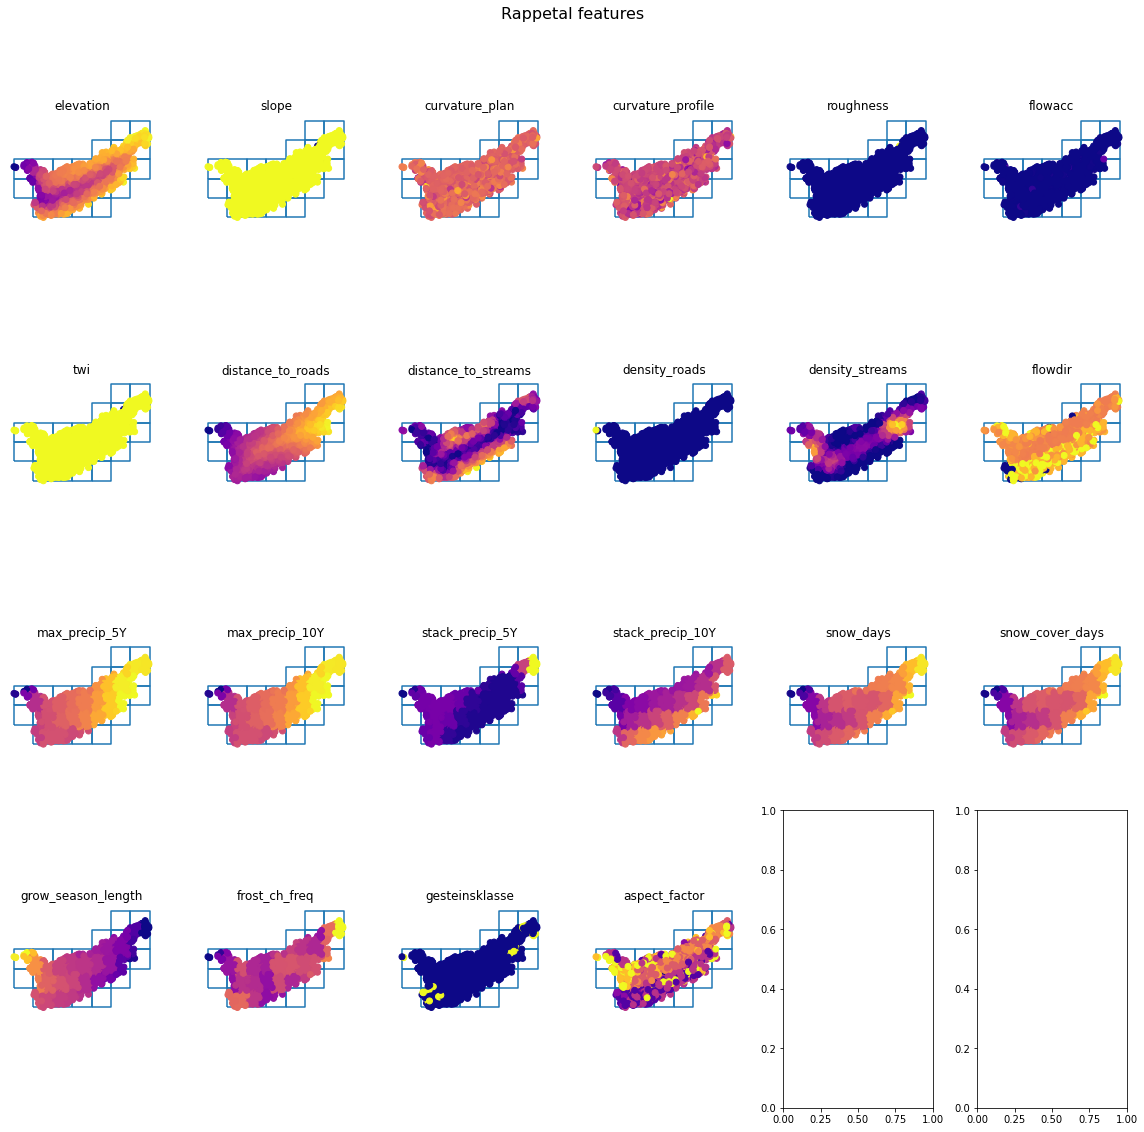

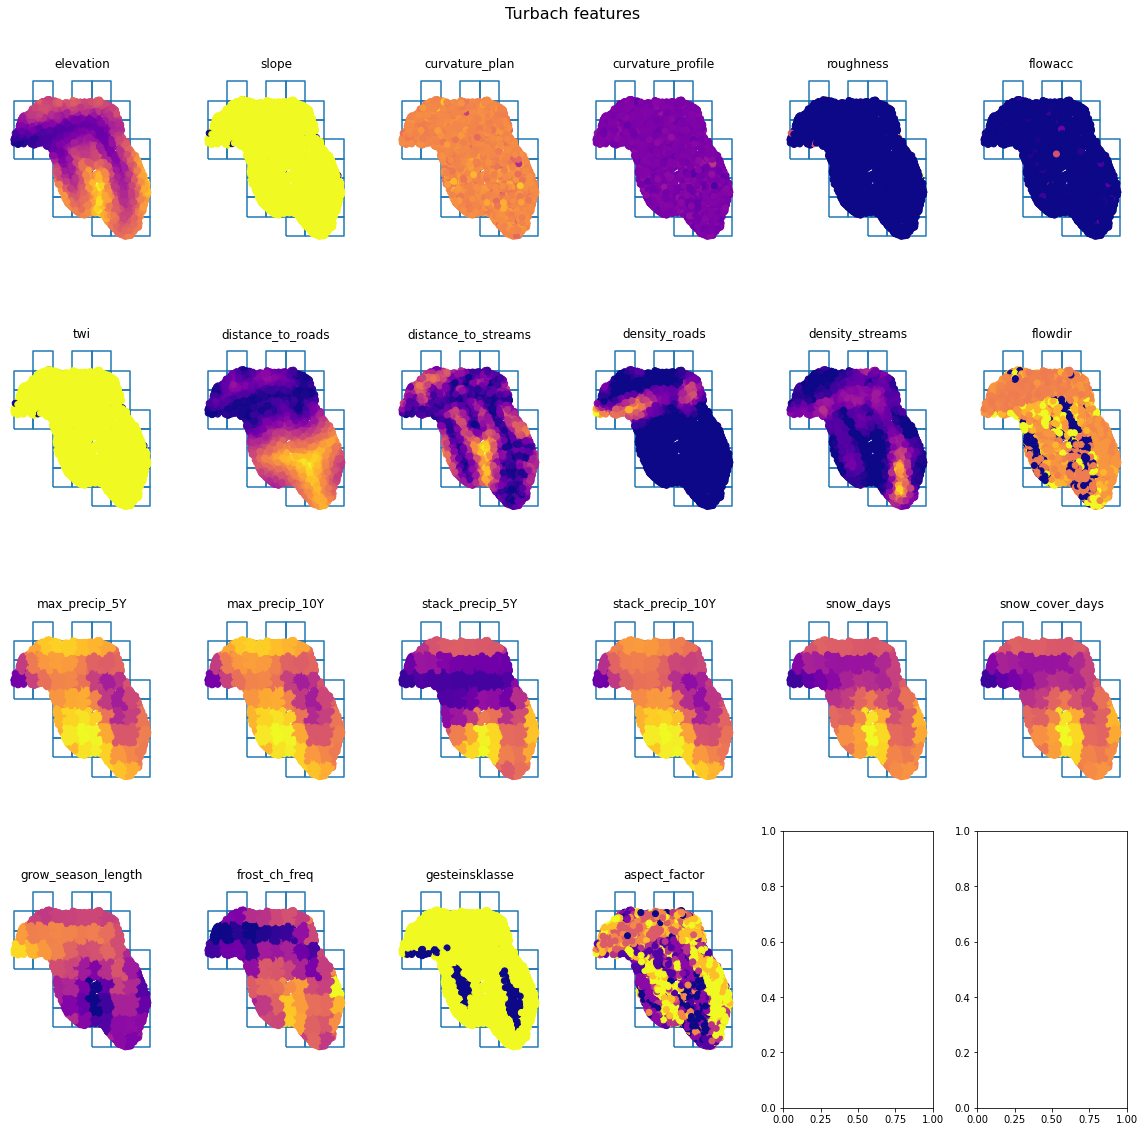

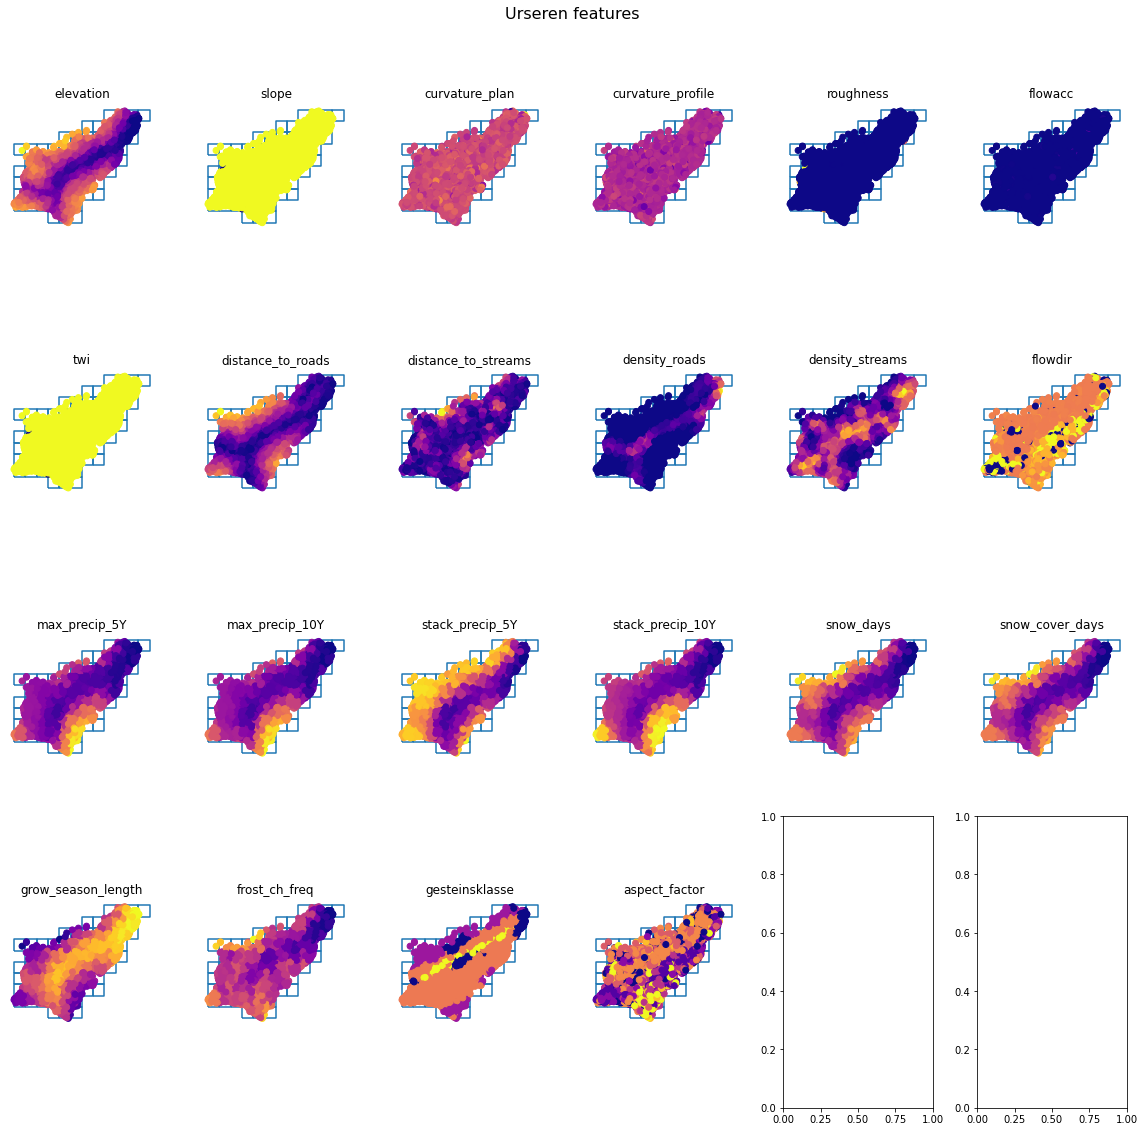

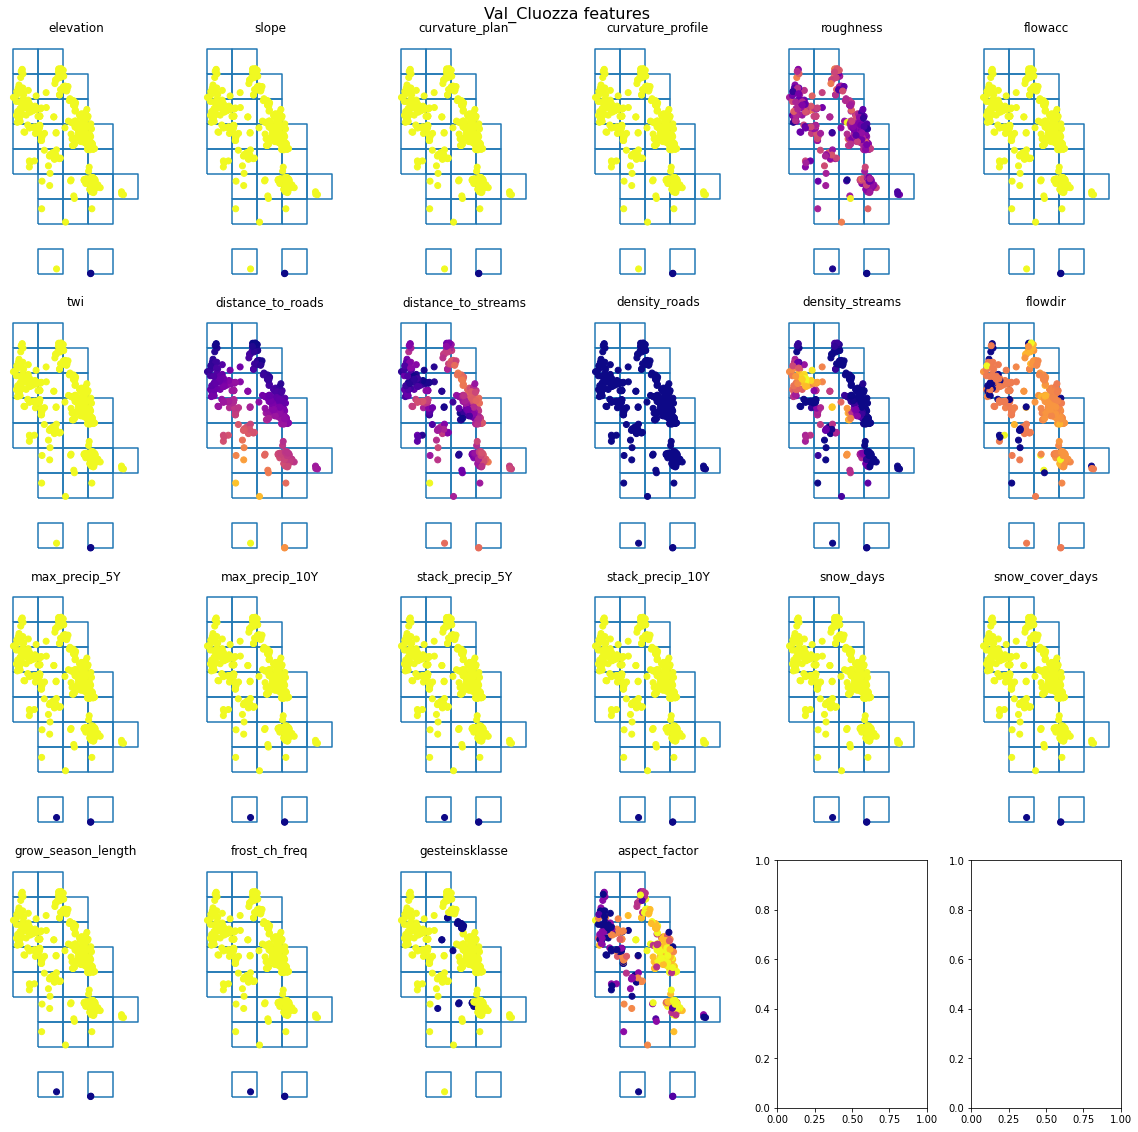

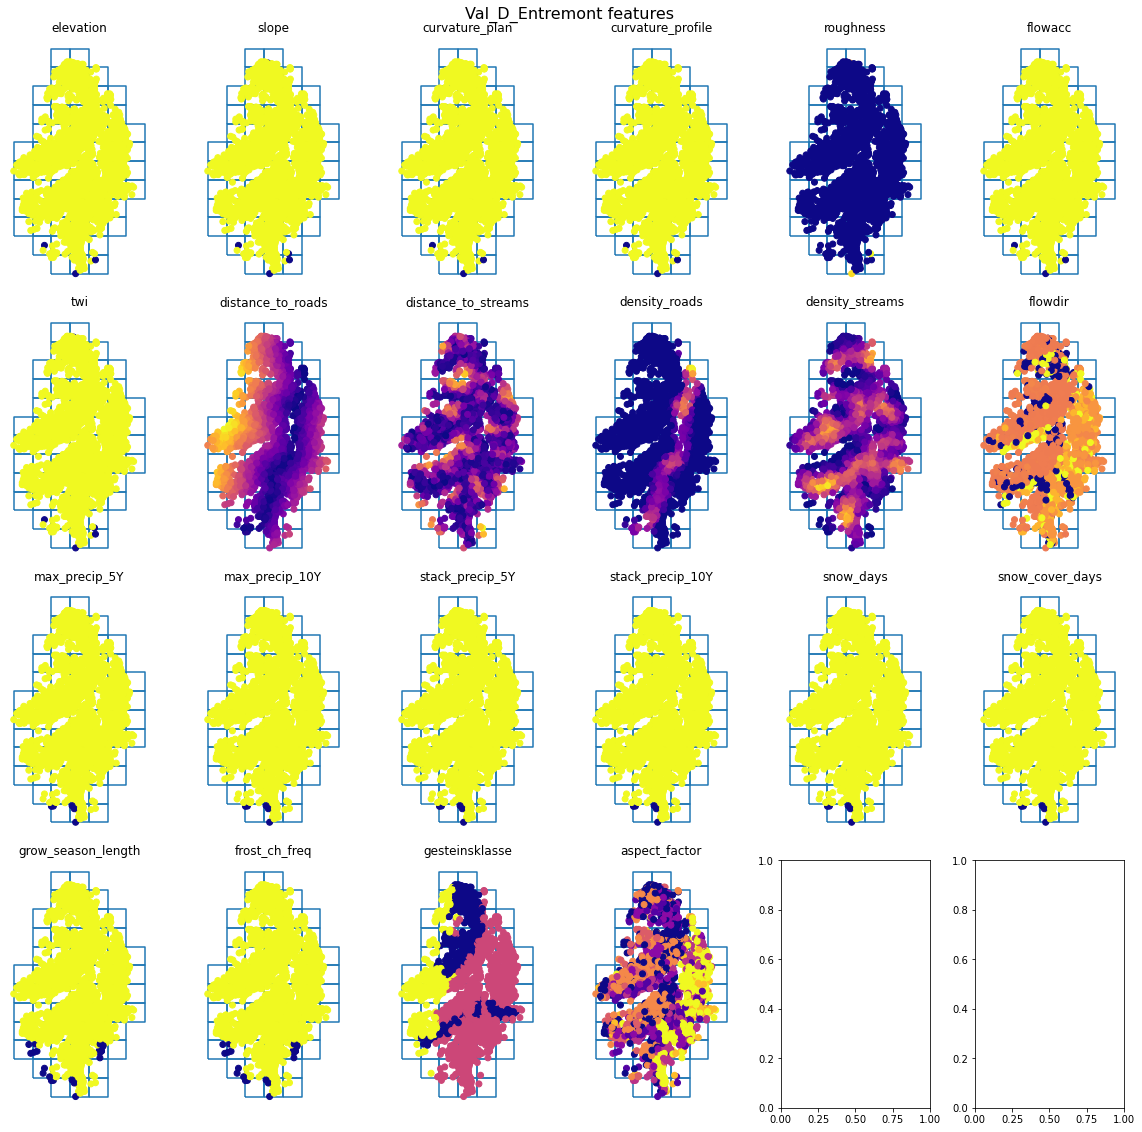

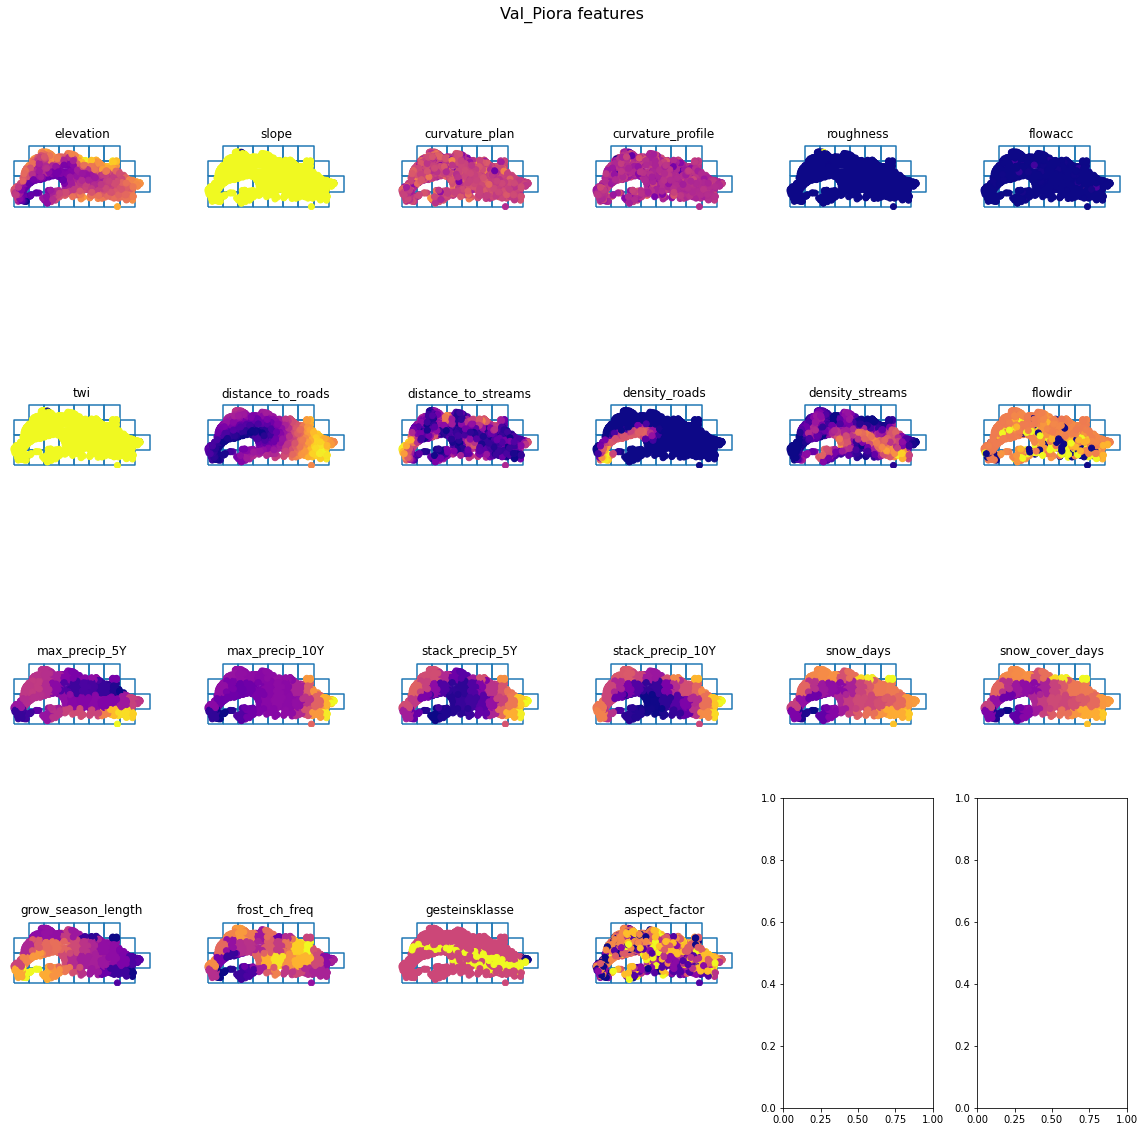

In [7]:

def plot_on_map(gdf_points, feature, ax):
    ax.axis('off')
    grid = generate_gird(1000, 1000, gdf_points.crs, *gdf_points.total_bounds)  # generate grid inside bounds
    grid = grid.loc[grid.intersects(gdf_points.unary_union)]  # filter grid cells that do not contain any point
    grid.boundary.plot(ax=ax, zorder=0)
    g = gdf_points.plot(
        feature,
        ax=ax,
        cmap='plasma',
        zorder=1
    )

plot_f(plot_on_map)

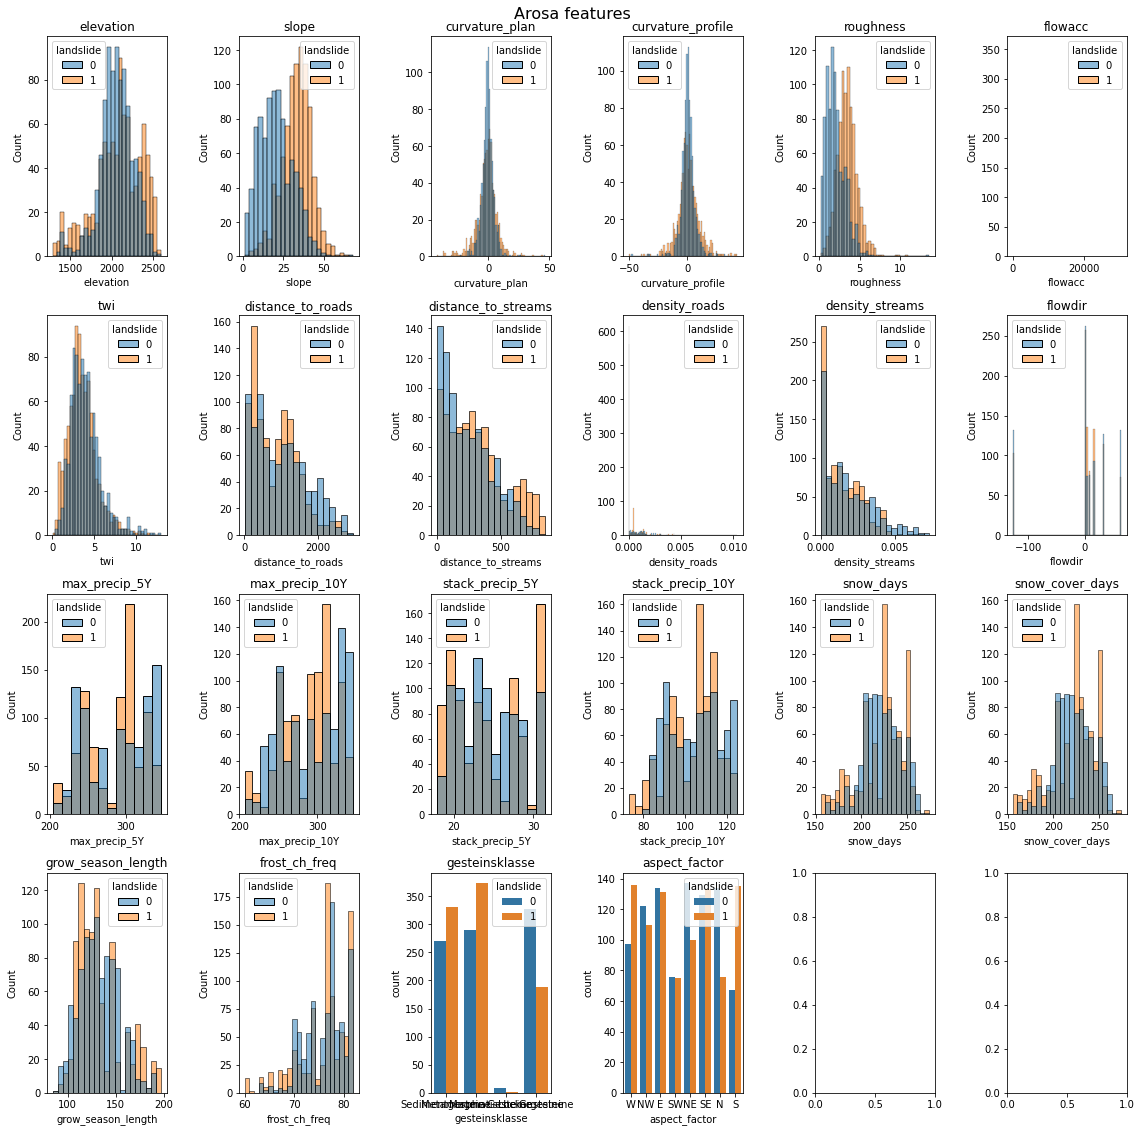

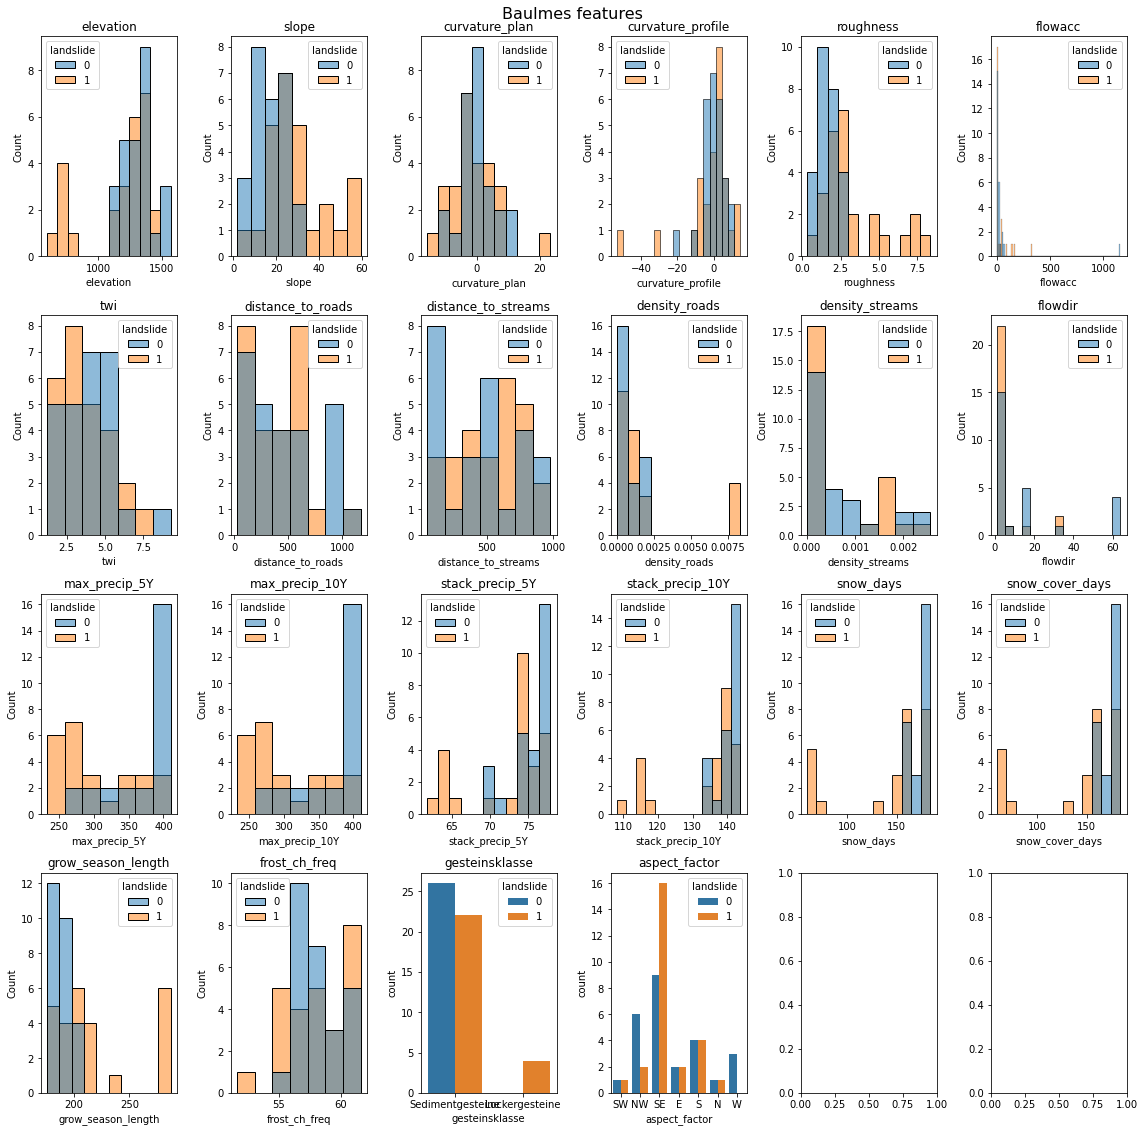

Error in slope Maximum allowed size exceeded
Error in twi Maximum allowed size exceeded


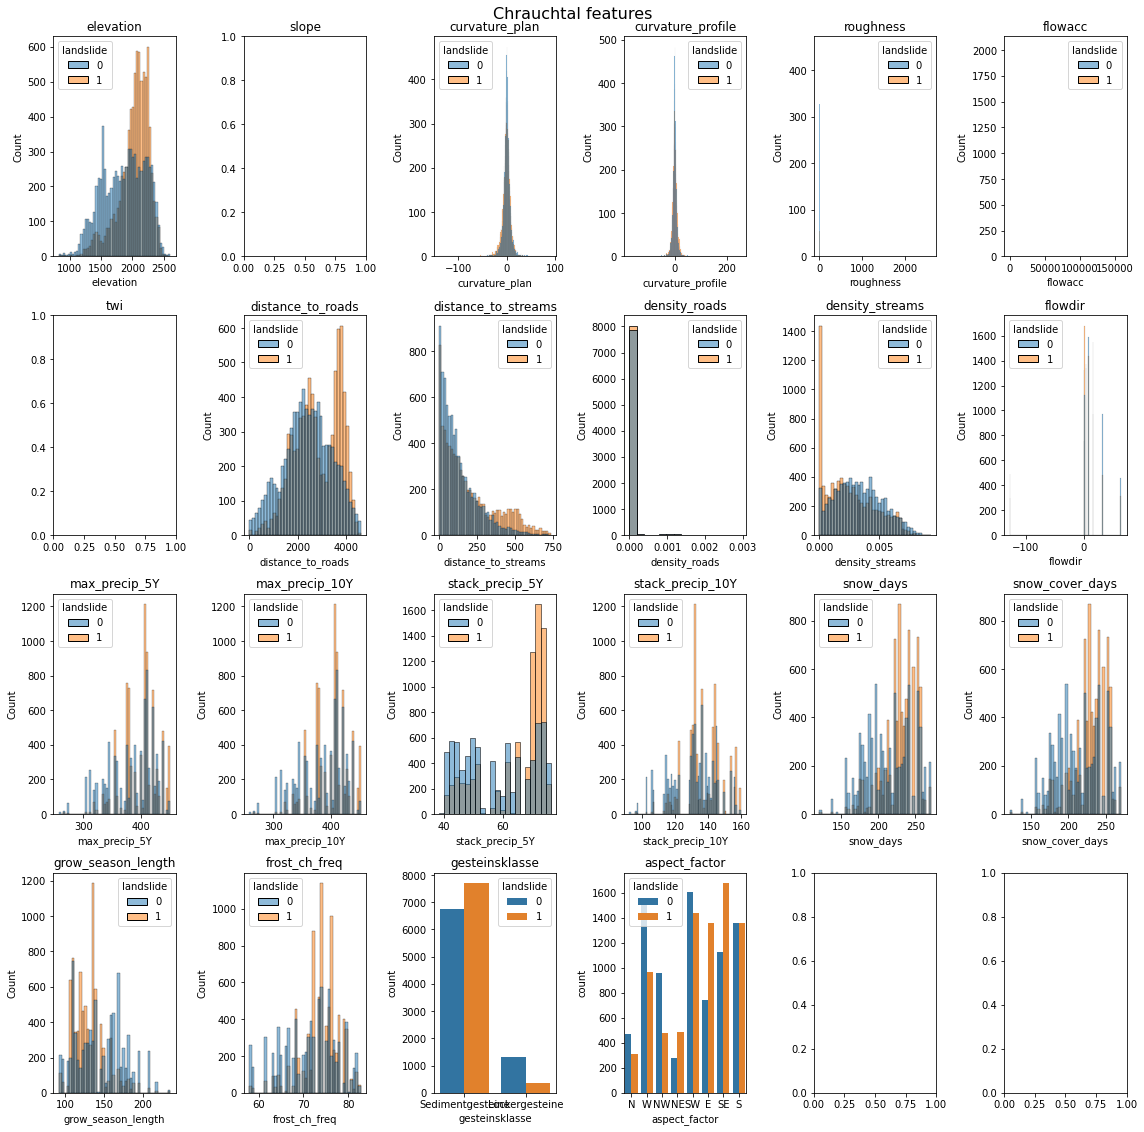

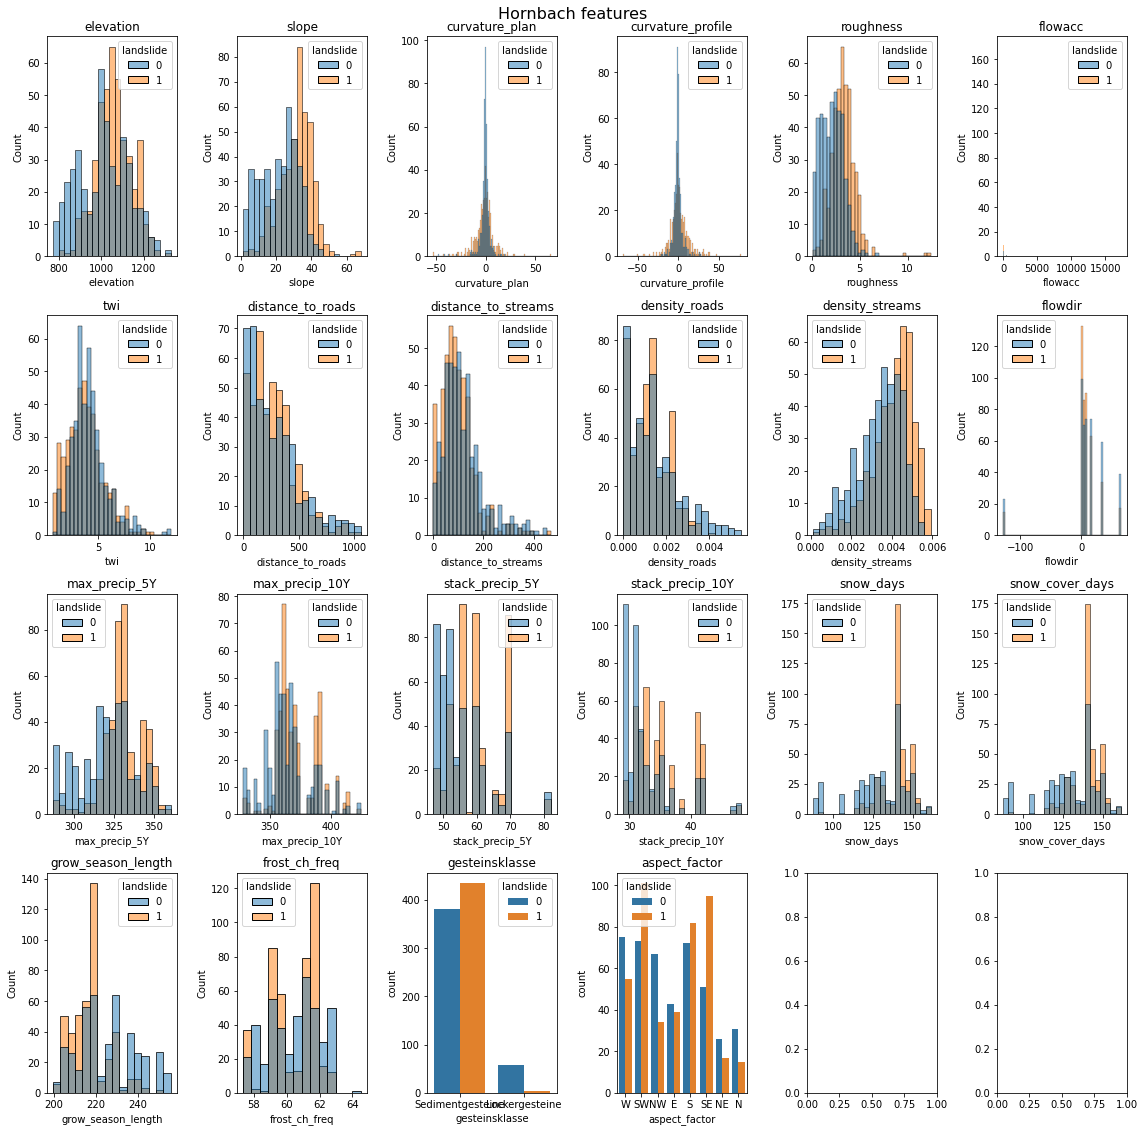

Error in slope Maximum allowed size exceeded
Error in twi Maximum allowed size exceeded


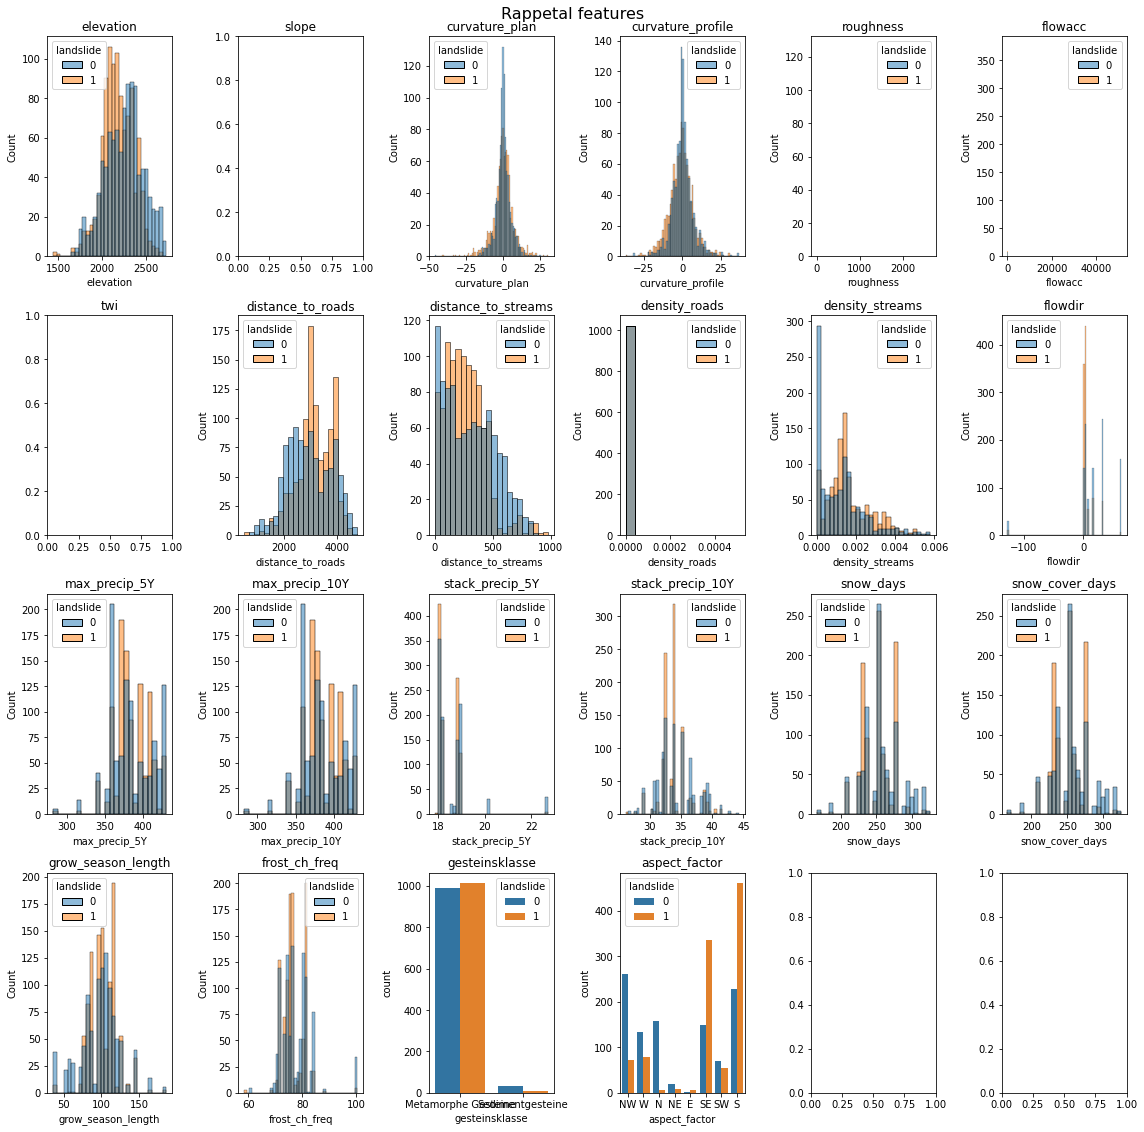

Error in slope Maximum allowed size exceeded
Error in twi Maximum allowed size exceeded


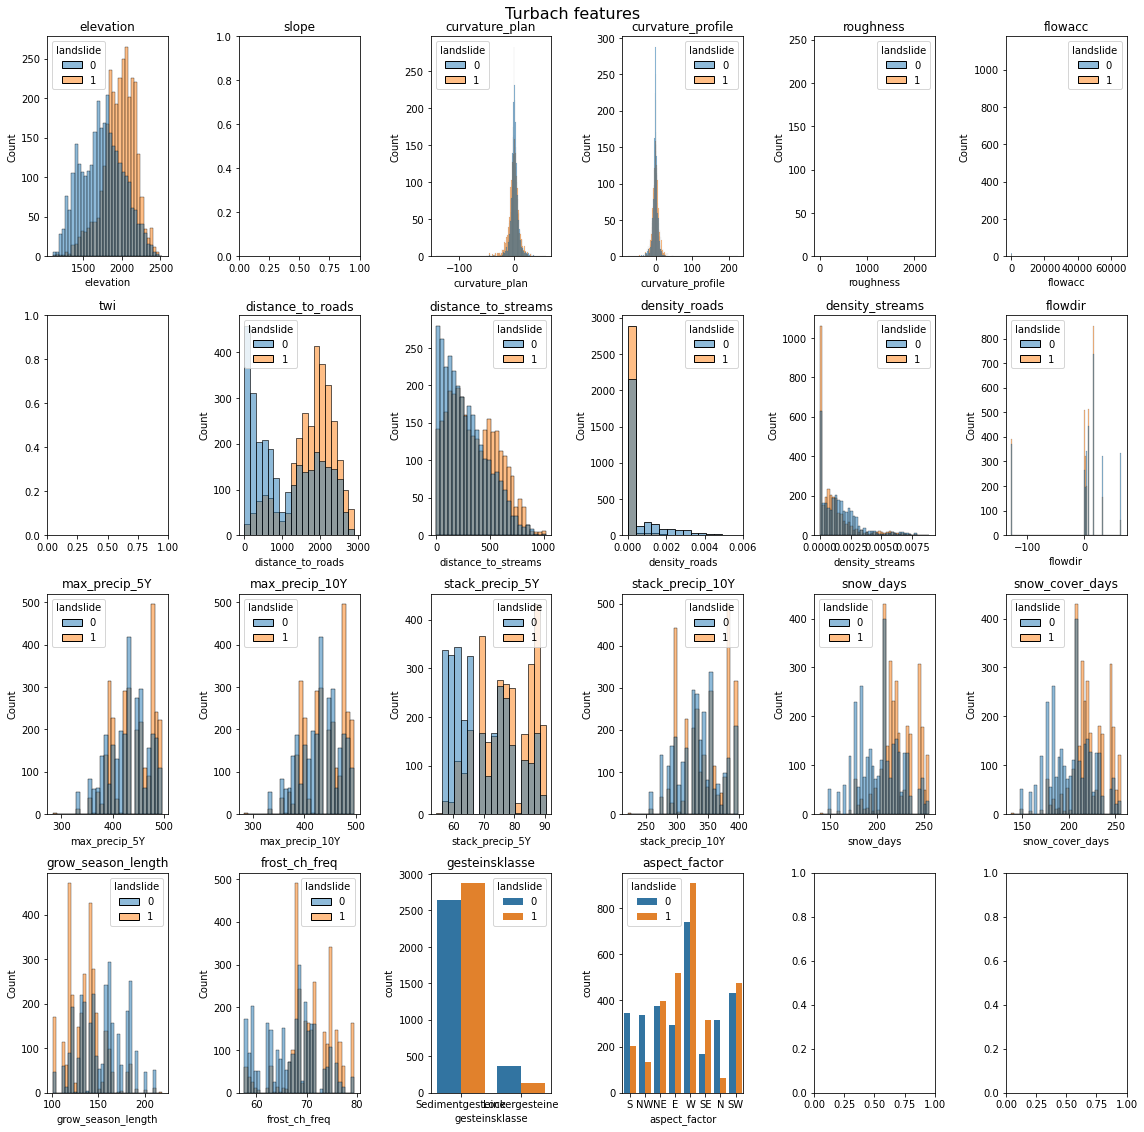

Error in slope Maximum allowed size exceeded
Error in twi Maximum allowed size exceeded


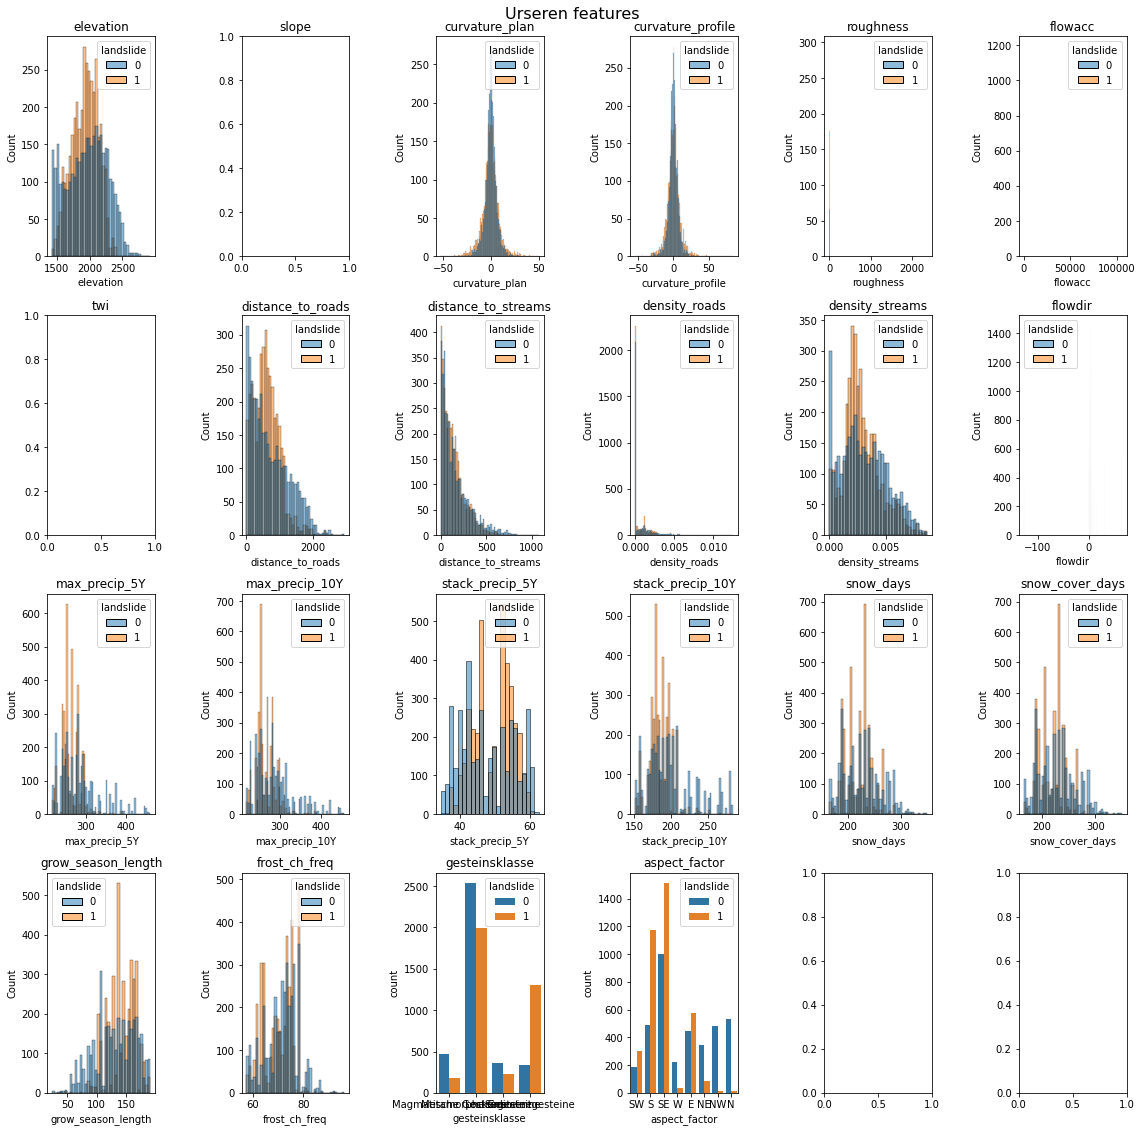

Error in elevation Maximum allowed size exceeded
Error in slope Maximum allowed size exceeded
Error in curvature_plan Maximum allowed size exceeded
Error in curvature_profile Maximum allowed size exceeded
Error in flowacc Maximum allowed size exceeded
Error in twi Maximum allowed size exceeded
Error in max_precip_5Y Maximum allowed size exceeded
Error in max_precip_10Y Maximum allowed size exceeded
Error in stack_precip_5Y Maximum allowed size exceeded
Error in stack_precip_10Y Maximum allowed size exceeded
Error in snow_days Maximum allowed size exceeded
Error in snow_cover_days Maximum allowed size exceeded
Error in grow_season_length Maximum allowed size exceeded
Error in frost_ch_freq Maximum allowed size exceeded


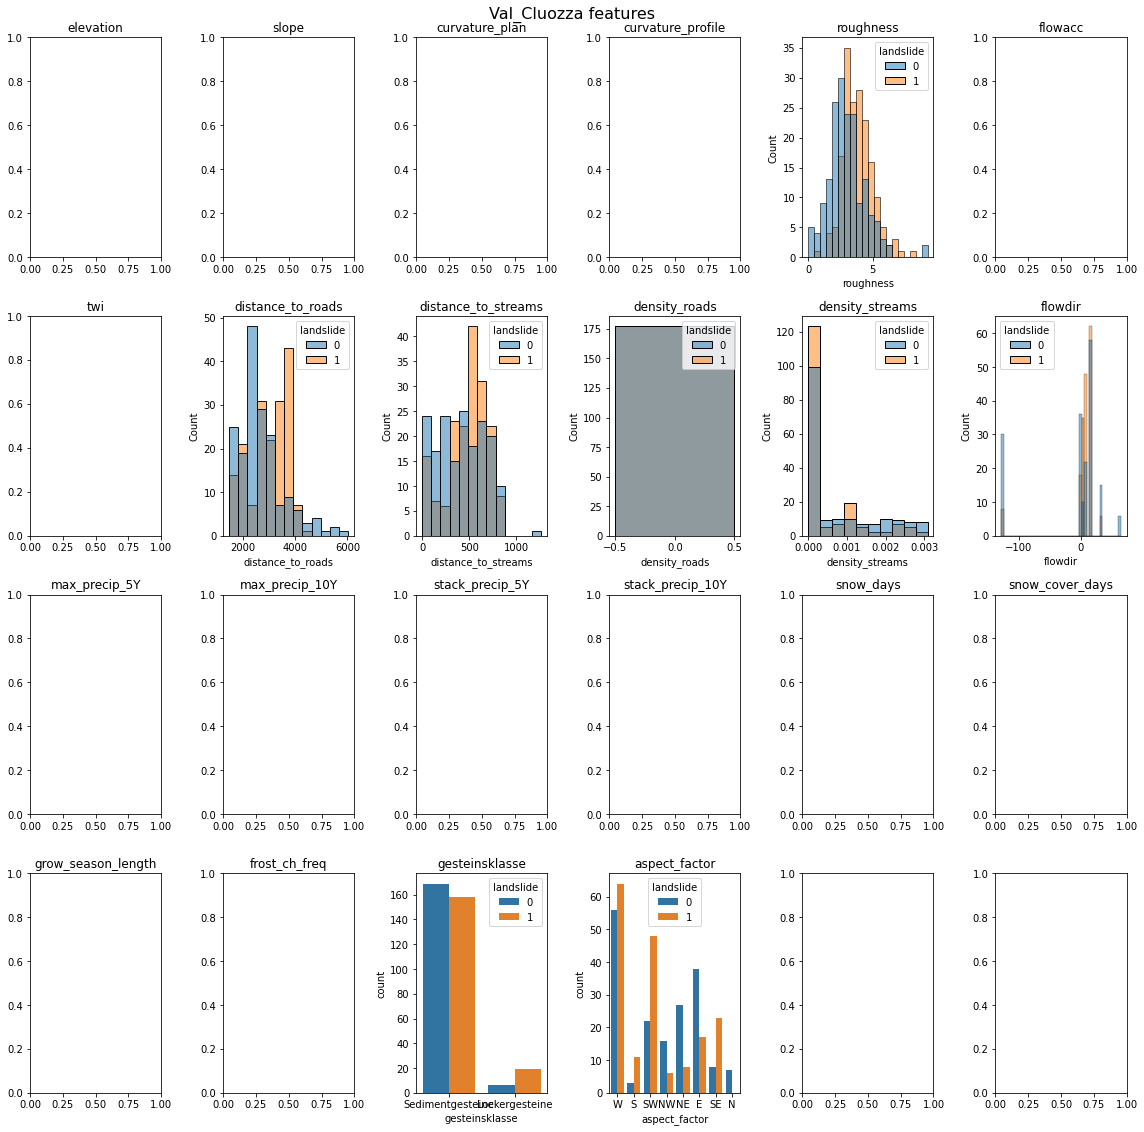

Error in elevation Maximum allowed size exceeded
Error in slope Maximum allowed size exceeded
Error in curvature_plan Maximum allowed size exceeded
Error in curvature_profile Maximum allowed size exceeded
Error in flowacc Maximum allowed size exceeded
Error in twi Maximum allowed size exceeded
Error in max_precip_5Y Maximum allowed size exceeded
Error in max_precip_10Y Maximum allowed size exceeded
Error in stack_precip_5Y Maximum allowed size exceeded
Error in stack_precip_10Y Maximum allowed size exceeded
Error in snow_days Maximum allowed size exceeded
Error in snow_cover_days Maximum allowed size exceeded
Error in grow_season_length Maximum allowed size exceeded
Error in frost_ch_freq Maximum allowed size exceeded


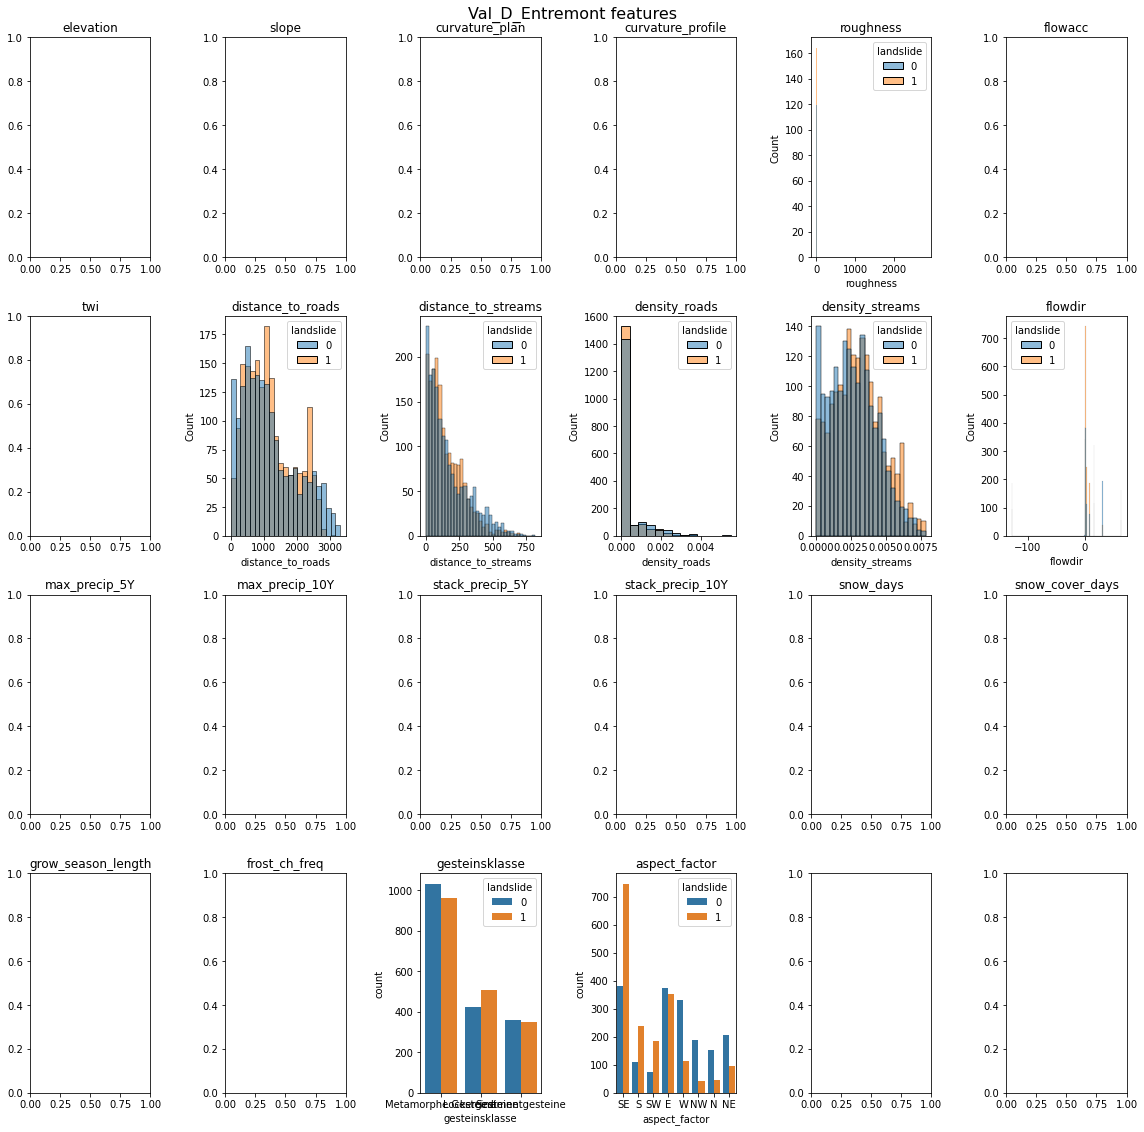

Error in slope Maximum allowed size exceeded
Error in twi Maximum allowed size exceeded


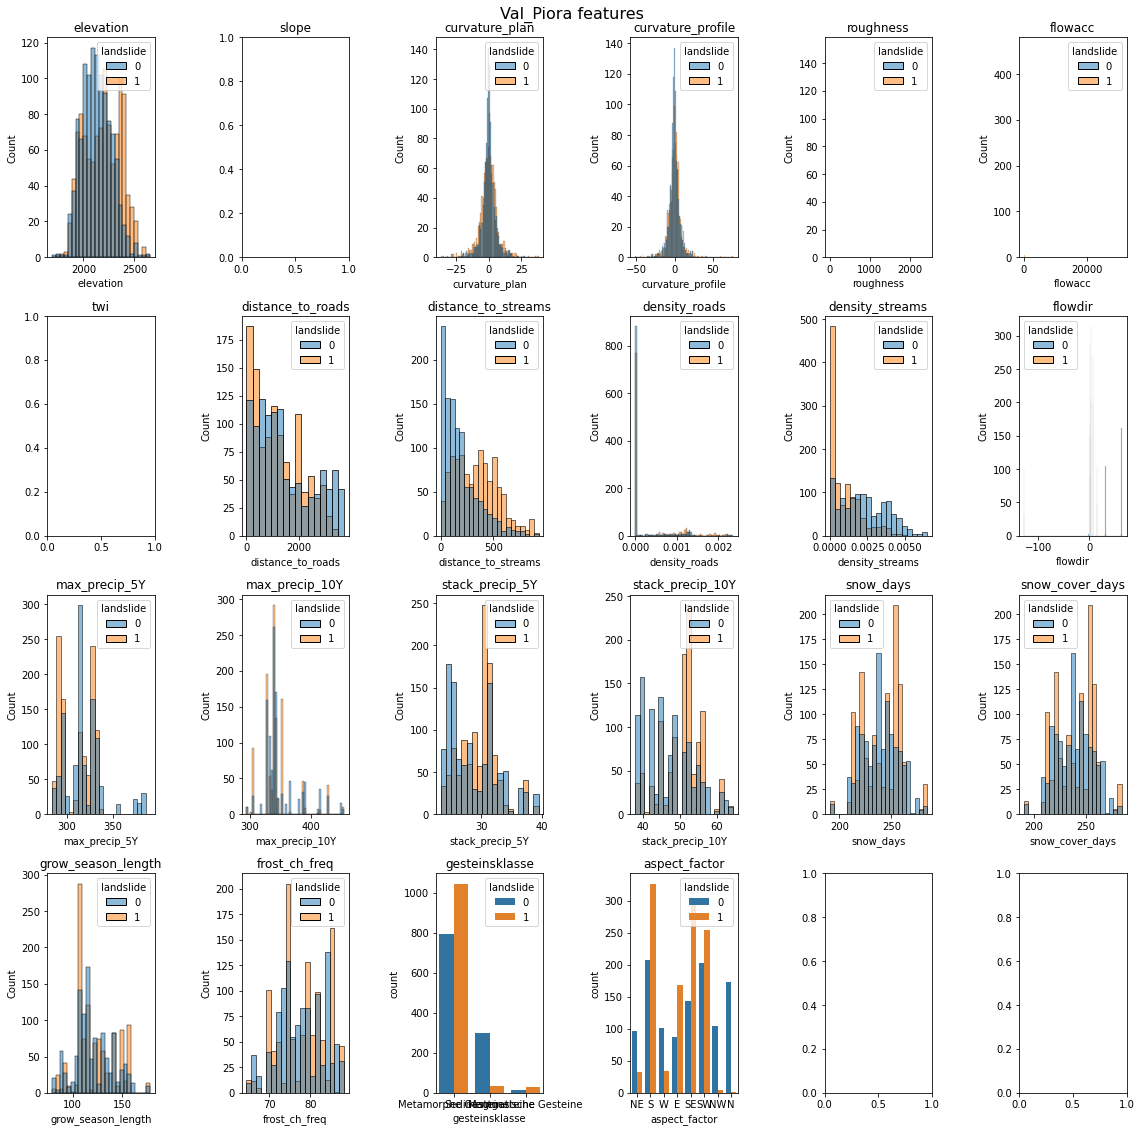

In [8]:
import numpy as np

def plot_hist(gdf, feature, ax):
    try:
        if np.issubdtype(gdf[feature].dtype, np.number):
            sns.histplot(data=gdf, x=feature, hue='landslide', ax=ax)
        else:
            sns.countplot(data=gdf, x=feature, hue='landslide', ax=ax)
    except Exception as e:
        print(f"Error in {feature}", e)
        pass

plot_f(plot_hist)